<a href="https://colab.research.google.com/github/lili-hdz/inteligencia_artificial/blob/main/Multicapa%20/EXPO_MULTICAPA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Equipo 7


*   Daniela Hernández Carrada
*   Liliana Patricia Hernández Cruz


# **Predicción del sexo del migrante**




# **Datos**

El conjunto “PDS-PDSE Julio-Octubre 2023.csv” contiene información de migrantes, incluyendo variables como:

- Edad

- Nivel educativo (nivel)

- País donde vive (paisvive)

- Razón de migración (razon)

- Si trabaja (trabaja)

- Oficio de origen (oficio_origen)

- Sexo (variable objetivo a predecir)


# Nuestro objetivo será predecir si el migrante es hombre o mujer a partir de las demás características.

In [ ]:
from google.colab import files
files.upload()

Saving PDS-PDSE Julio-Octubre 2023.csv to PDS-PDSE Julio-Octubre 2023.csv


{'PDS-PDSE Julio-Octubre 2023.csv': b'folio,unidad,trim,region,ciudad,punto,turno,sexo,edad,nacio,origen,viveloc,paisvive,razon,trabaja,regresa,p1,p1_1,p1_1_1,p1_1_1_1_1,p1_1_1_1_2,p1_2,p2,p2_1,p2_1_1a,p2_1_1n,p2_1_2a,p2_1_2n,p3,p4,p4_1,p5,p6,p7,p8,p8_1,p9,p9_1_1,p9_1_2,p9_1_3,p9_2,p9_3,p10p,p10e,p10m,p10u,p11,p11_1p,p11_1e,p11_1m,p11_1u,p11_1u_b,p12,p13,p13_1_1,p13_1_2,p13_1_3,p13_1_4,p13_1_5,p13_1_6,p13_1_7,p13_1_8,p13_1_9,p13_1_10,p14,p14_1,p14_2,p14_3,p14_3_1c,p14_3_1t,p14_4,p15_1,p15_2,p15_3,p15_4,p15_4_1,p15_5,p15_6,p15_7c,p15_7u,p15_7t,p15_8,p15_9,p15_10,p15_11,p15_12_1,p15_12_2,p15_12_3,p15_12_4,p15_12_5,p15_12_6,p15_12_7,p15_13,p15_13_1_1,p15_13_1_2,p16_1,p16_2,p16_3,p17_0_1,p17_0_2,p17_1_1,p17_1_2,p17_2_1,p17_2_2,p17_2_3,p17_2_4,p17_2_5,p17_2_6,p17_2_7,p17_2_8,p17_2_9,p17_2_10,p17_3_1,p17_3_2,p17_3_3,p17_3_4,p17_3_5,p17_3_6,p17_3_7,p17_3_8,p17_3_9,p17_4,p17_4_1,p18,p19,p19_1,p20c,p20t,p20_1_0_1,p20_1_0_2,p20_1_0_3,p20_1_0_4,p20_1_0_5,p20_1_0_6,p20_2,p20_3,p20_4,p20_4_1,p21,p2

In [ ]:

import pandas as pd

# Ruta del archivo CSV
ruta = "PDS-PDSE Julio-Octubre 2023.csv"

# Cargar la base de datos
df = pd.read_csv(ruta)

# Mostrar columnas principales
print(df[['sexo', 'edad', 'nivel', 'paisvive', 'razon', 'trabaja', 'oficio_origen']].head())


   sexo  edad  nivel  paisvive  razon  trabaja  oficio_origen
0     1    34   -999         1      8       -7           -999
1     1    36   -999         1      7       -7           -999
2     1    26   -999         1      8       -7           -999
3     1    31   -999         1      9       -7           -999
4     2    27   -999         3      8       -7           -999


Verificar que los datos se carguen correctamente y que las columnas estén presentes.

In [ ]:
# Variables que vamos a usar como predictoras
features = ['edad', 'nivel', 'paisvive', 'razon', 'trabaja', 'oficio_origen']

# Eliminamos filas con datos nulos
df = df[features + ['sexo']].dropna()

print("Filas después de limpiar datos:", len(df))

Filas después de limpiar datos: 663


Dejar solo las columnas necesarias y eliminar valores nulos.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Codificar la variable objetivo 'sexo'
encoder_sexo = LabelEncoder()
df['sexo'] = encoder_sexo.fit_transform(df['sexo'])  # 0 = Hombre, 1 = Mujer

# Codificar las variables categóricas
categorical_cols = ['nivel', 'paisvive', 'razon', 'trabaja', 'oficio_origen']

for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

df.head()

,edad,nivel,paisvive,razon,trabaja,oficio_origen,sexo
0,34,0,0,7,0,2,0
1,36,0,0,6,0,2,0
2,26,0,0,7,0,2,0
3,31,0,0,8,0,2,0
4,27,0,1,7,0,2,1


Convertir texto en números para que la red neuronal pueda procesarlos.

In [ ]:
from sklearn.model_selection import train_test_split

X = df[features].values
y = df['sexo'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (530, 6)
Tamaño del conjunto de prueba: (133, 6)


Separar datos para entrenar (80%) y evaluar (20%) el modelo.

In [ ]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Ejemplo de datos normalizados:", X_train[0])


Ejemplo de datos normalizados: [ 1.58082838 -1.17125441 -0.28183281 -1.46028691  1.21516892 -0.81347914]


Escalar los valores numéricos para mejorar el aprendizaje del modelo.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Definir la estructura del modelo
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilación
adam_optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Crear una red neuronal con 2 capas ocultas y salida sigmoidal para clasificación binaria.

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - accuracy: 0.6336 - loss: 0.6596 - val_accuracy: 0.6604 - val_loss: 0.6435
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6740 - loss: 0.6374 - val_accuracy: 0.6604 - val_loss: 0.6400
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6507 - loss: 0.6369 - val_accuracy: 0.6698 - val_loss: 0.6378
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7028 - loss: 0.6040 - val_accuracy: 0.6792 - val_loss: 0.6378
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6872 - loss: 0.6130 - val_accuracy: 0.6792 - val_loss: 0.6360
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6944 - loss: 0.6083 - val_accuracy: 0.6887 - val_loss: 0.6373
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6900 - loss: 0.6063 - val_accuracy: 0.6792 - val_loss: 0.6420
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6732 - loss: 0.6248 - val_accuracy: 0.6604 - val_los

Entrenar durante 50 épocas y ver cómo mejora la exactitud.

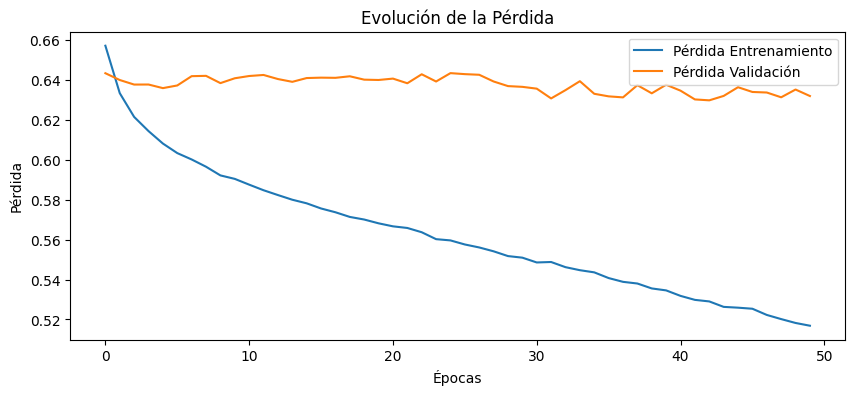

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida Validación')
plt.title('Evolución de la Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

Visualizar cómo aprendió el modelo a lo largo de las épocas. Función de pérdida debe tender hacia cero, para poder decir que el modelo esta teniendo un aprendizaje correcto.

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Exactitud en el conjunto de prueba: {accuracy*100:.2f}%")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.7348 - loss: 0.5357
Exactitud en el conjunto de prueba: 73.68%


medir el rendimiento real del modelo después de haber sido entrenado y validado

comprobamos si la red neuronal aprendió correctamente a distinguir entre las clases (por ejemplo, entre “hombre” y “mujer”).

NOTA: Pérdida (loss):
Mide cuánto se equivoca el modelo. Mientras más bajo sea este valor, mejor.
Exactitud (accuracy):
Es la proporción de aciertos del modelo. Una accuracy del 75.59 % quiere decir que el modelo acertó correctamente en 75 de cada 100 predicciones.
O sea, en el conjunto de prueba, el modelo fue capaz de clasificar bien el sexo (hombre o mujer)

In [ ]:
predictions = model.predict(X_test)
comparison = pd.DataFrame({'Actual': y_test, 'Prediccion': predictions.flatten()})
print(comparison.head())

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
   Actual  Prediccion
0       1    0.411312
1       0    0.419524
2       0    0.155218
3       0    0.152598
4       0    0.194866


Permite comparar lo que tu red neuronal predijo vs. los valores reales del conjunto de prueba.


Métricas de Clasificación:
Exactitud (Accuracy): 73.68%
Precisión: 64.10%
Sensibilidad (Recall): 54.35%
F1-score: 58.82%


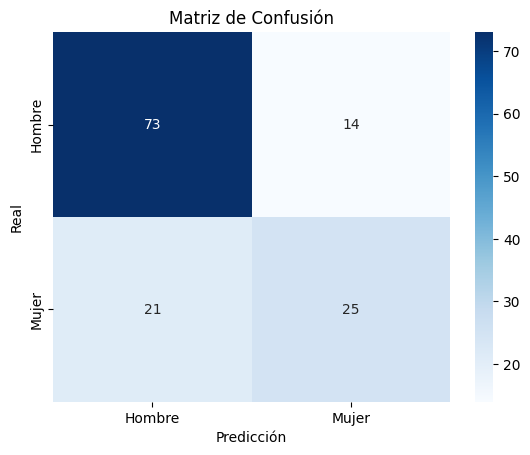

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Convertir las predicciones continuas (0-1) a etiquetas binarias (0 o 1)
pred_bin = (predictions > 0.5).astype(int)

# Calcular métricas adecuadas de clasificación
acc = accuracy_score(y_test, pred_bin)
prec = precision_score(y_test, pred_bin)
rec = recall_score(y_test, pred_bin)
f1 = f1_score(y_test, pred_bin)

print(f"\nMétricas de Clasificación:")
print(f"Exactitud (Accuracy): {acc*100:.2f}%")
print(f"Precisión: {prec*100:.2f}%")
print(f"Sensibilidad (Recall): {rec*100:.2f}%")
print(f"F1-score: {f1*100:.2f}%")

# Matriz de confusión
cm = confusion_matrix(y_test, pred_bin)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Hombre', 'Mujer'], yticklabels=['Hombre', 'Mujer'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

Evalúa la calidad de la red neuronal multicapa que predice si un migrante es hombre (0) o mujer (1).